In [1]:
import corner
import emcee
import numpy as np

In [14]:
from matplotlib import pyplot as plt
filename = '/Users/franceschi/mysims/IMLup/IMLup_SPHERE_fit/chain.hdf5'
reader = emcee.backends.HDFBackend(filename)

samples = reader.get_chain(flat=False, discard=300)
log_prob_samples = reader.get_log_prob(flat=True)
# log_prior_samples = reader.get_blobs(flat=True)

ndim = 7

print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

flat chain shape: (144, 30, 7)
flat log prob shape: (13320,)


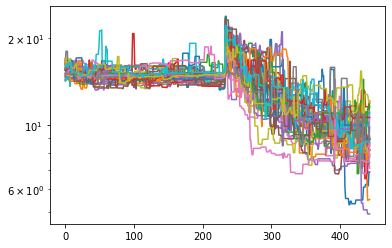

In [12]:
f, ax = plt.subplots()
logp = reader.get_log_prob()
ax.semilogy(-logp);


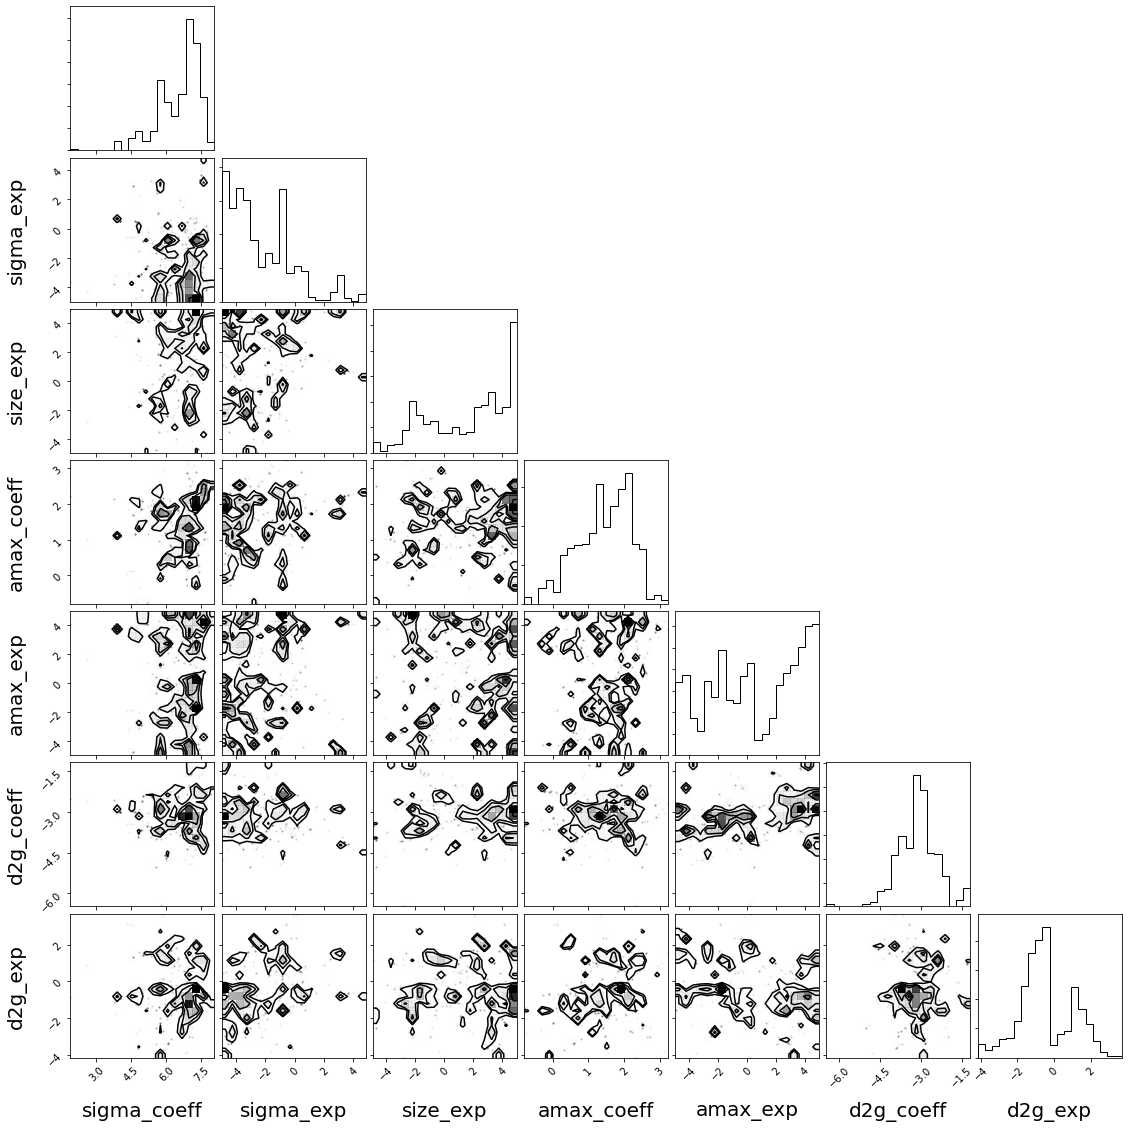

In [19]:
# TODO:
# take the log of the coefficients before corner plot
# all_samples = np.concatenate(
#     (samples, log_prob_samples[300:, None]), axis=1
# )

samples = reader.get_chain(flat=True, discard=300)

samples[:, 0] = np.log(samples[:, 0])
samples[:, 3] = np.log(samples[:, 3])
samples[:, 5] = np.log(samples[:, 5])

labels = ["sigma_coeff",
          "sigma_exp",
          "size_exp",
          "amax_coeff",
          "amax_exp",
          "d2g_coeff",
          "d2g_exp",
          ]

label_kwargs = {
    'fontsize':  20,
}

corner.corner(samples, labels=labels, label_kwargs=label_kwargs)
plt.savefig("corner.pdf")

In [4]:
reader.accepted

array([133., 103., 145., 115., 113., 119., 131., 115., 120., 141.,  79.,
       119., 113., 130., 125., 105., 113.,  86.,  98., 113., 107., 112.,
        81., 136., 132., 114., 109., 122., 123., 124.])

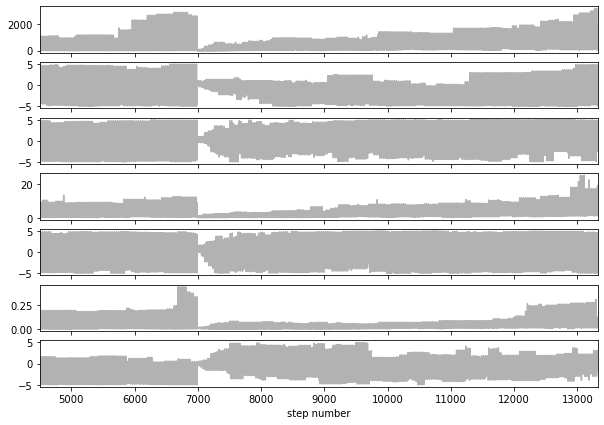

In [11]:
fig, axes = plt.subplots(ndim, figsize=(10, 7), sharex=True)
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, i], "k", alpha=0.3)
    ax.set_xlim(4500, len(samples))
    # ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [12]:
run_folder = ...
blobs = sorted(Path(run_folder).glob('run_*.pickle'))

for filename in blobs:
    with open(filename, 'rb') as  fn:
        out = pickle.load(fn)
        print(out)

TypeError: expected str, bytes or os.PathLike object, not ellipsis